# Title: Multi trophic risk alters predator - prey behavioural response races

Description: Agent Based Model (ABM) of multi-trophic predator-prey interactions in a spatially explicit environment as an extension of Dewdney (1998) and Mitchel and Lima (2002).

In [94]:

# import classes and dependencies

from abm_resource import model_1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

### Run model

In [95]:
# parameters

# grid

width = 30
height = 30

# model

steps = 250

# agents
predator = 50
prey = 50

# agent parameters

## predator

predator_info = False # if True, the predator will have a memory of the prey
p_rep = 0.01 # reproduction rate
p_energy = 5 # starting energy level

## prey
prey_info = False # if True, the prey will have a memory of the predator
prey_rep = 0.01 # reproduction rate
prey_energy = 20 # starting energy level

## resource productivity
resource_rate = 0.01 # rate of resource growth
patchy = 0 # if True, the resource will grow in patches

In [96]:
# Run model

m = model_1(predator = predator, prey=prey, 
            prey_info=prey_info, predator_info=predator_info, 
            width=width, height=height,
            predator_r=p_rep, prey_r=prey_rep,
            predator_energy=p_energy, prey_energy=prey_energy,
            resource_rate=resource_rate, patchy=patchy)

m.run_model(steps)


Step: 0
Step: 1
Step: 2
Predator agent reproduced: 995 (11, 28)
Step: 3
Prey agent reproduced: 995 (1, 24)
Step: 4
Step: 5
Predator agent died: 35
Predator agent died: 14
Predator agent died: 46
Predator agent died: 19
Predator agent died: 49
Predator agent died: 15
Predator agent died: 12
Predator agent died: 22
Predator agent died: 32
Predator agent died: 42
Predator agent died: 18
Predator agent died: 17
Predator agent died: 48
Predator agent died: 47
Predator agent died: 34
Predator agent died: 4
Predator agent died: 37
Predator agent died: 25
Predator agent died: 1
Predator agent died: 2
Predator agent died: 24
Predator agent died: 40
Predator agent died: 13
Predator agent died: 8
Predator agent died: 5
Predator agent died: 30
Predator agent died: 6
Predator agent died: 21
Predator agent died: 43
Predator agent died: 10
Predator agent died: 41
Predator agent died: 16
Predator agent died: 38
Predator agent died: 31
Predator agent died: 9
Predator agent died: 45
Predator agent died:

## Visulaisation

### Abundance

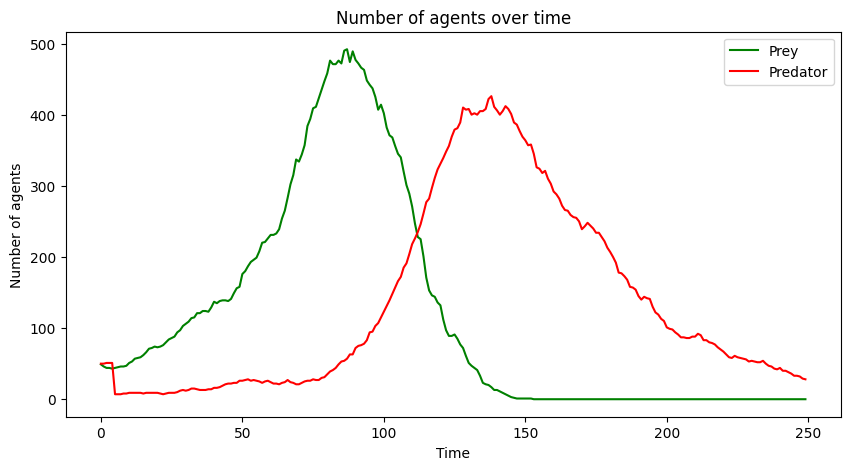

In [97]:

## visualize the model

## get number of prey, predator and resource agents over time

data = m.count.get_model_vars_dataframe()

prey = data['Prey']
predator = data['Predator']
## plot the number of prey, predator and resource agents over time

fig = plt.figure(figsize=(10, 5))

plt.plot(prey, label='Prey', color='green')
plt.plot(predator, label='Predator', color='red')

plt.xlabel('Time')
plt.ylabel('Number of agents')
plt.title('Number of agents over time')

plt.legend()

# save the plot

plt.savefig('abm_resource_pop.png')

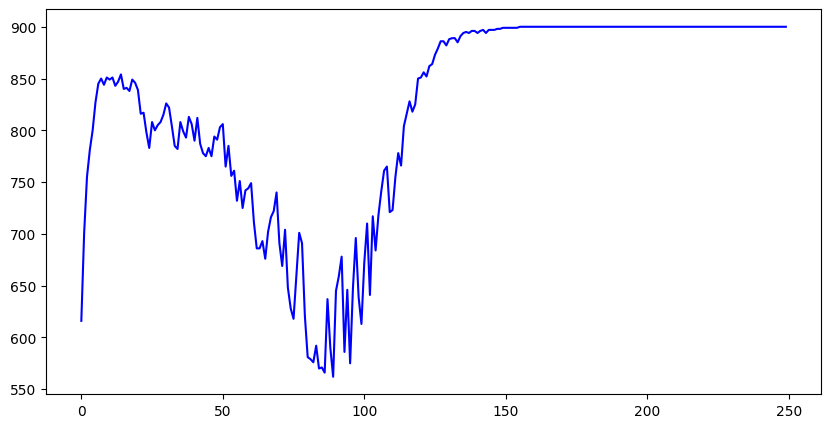

In [98]:
## plot resources

resource = data['Resource']

fig = plt.figure(figsize=(10, 5))

plt.plot(resource, label='Resource', color='blue')

# limits x-axis to 100


### Spatial distribution

In [99]:
## plot the spatial distribution of agents

## get the spatial data

spatial_data = m.spatial.get_agent_vars_dataframe()

## convert index to columns

spatial_data.reset_index(inplace=True)

print(spatial_data.head())



   Step  AgentID   x   y AgentType  Amount
0     1        0   2  16      Prey       1
1     1        1  18  23      Prey       1
2     1        3  27  28      Prey       1
3     1        4   8  20      Prey       1
4     1        5   1  25      Prey       1


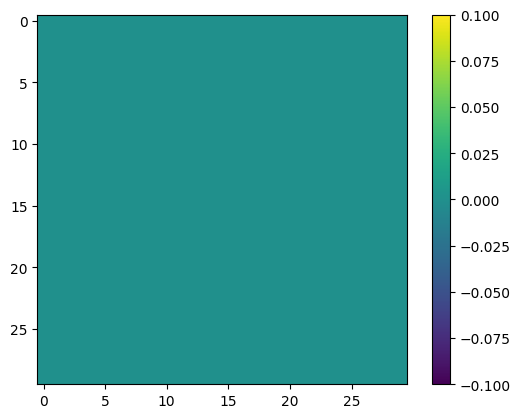

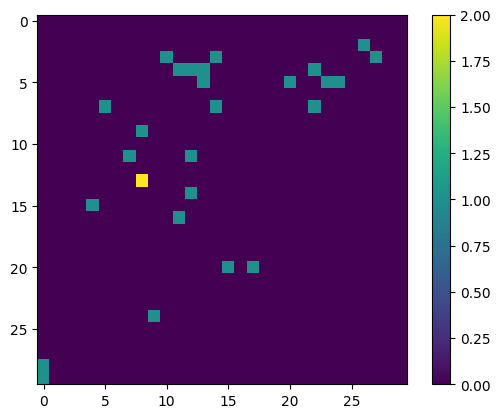

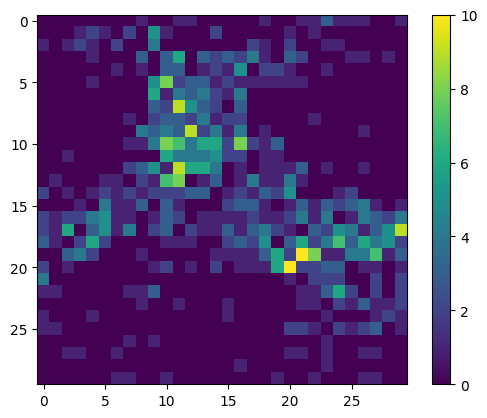

In [100]:

## plot the spatial distribution of prey, predator and resource agents


for agent_type in ['Prey', 'Predator']:
    
    grid =  np.zeros((m.width, m.height))
    
    for cell in m.grid.coord_iter():
        
        cell_content, (x, y) = cell
        
        x, y = int(x), int(y)
        
        for agent in cell_content:
            
            if type(agent).__name__ == agent_type:
                
                grid[x][y] += 1
        
    plt.imshow(grid, interpolation='nearest')
    plt.colorbar()
    plt.show()

## plot the spatial distribution of resource amount

grid =  np.zeros((m.width, m.height))

for cell in m.grid.coord_iter():
    
    cell_content, (x, y) = cell
    
    x, y = int(x), int(y)
    
    for agent in cell_content:
        
        if type(agent).__name__ == 'Resource':
            
            grid[x][y] += agent.amount
            
plt.imshow(grid, interpolation='nearest')
plt.colorbar()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


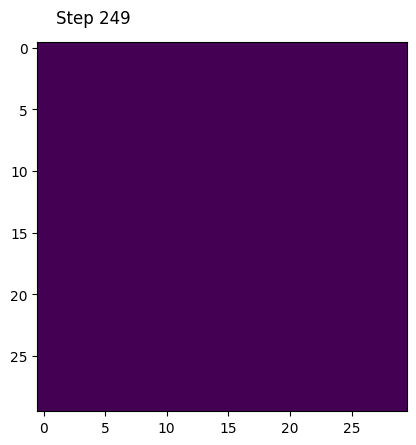

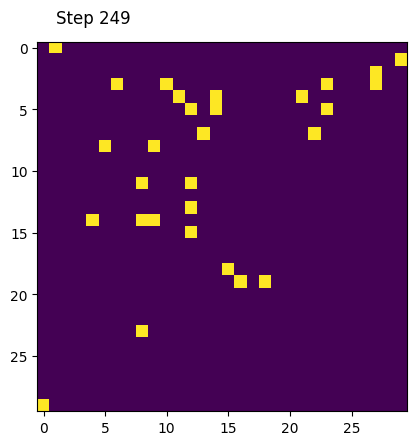

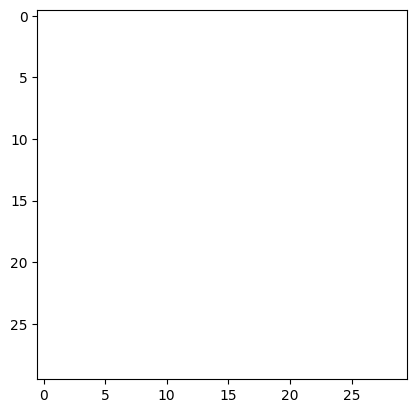

In [101]:
## plot gif of spatial distribution of agents over time

from matplotlib import animation
from matplotlib.pyplot import colorbar

## create a function to animate the spatial distribution of agents over time

def animate(m = m, spatial_data = spatial_data, steps = steps):
    
    fig, ax = plt.subplots()
    
    ims = []
    
    for i in range(1, steps, 1):
        
        spatial_data_time = spatial_data[spatial_data.Step == i]
        
        grid = np.zeros((m.width, m.height))
        
        for index, row in spatial_data_time.iterrows():
            
            x = row['x']
            y = row['y']
            amount = row['Amount']
            
            grid[x][y] += amount
            
        im = ax.imshow(grid, interpolation='nearest')       
        
        text = plt.text(1, -2, f'Step {i}', fontsize=12, color='black')
        
        ims.append([im, text])
        
    ani = animation.ArtistAnimation(fig, ims, interval=10, blit=False, repeat_delay=1000)
    
    return ani    
    


for agent_type in ['Prey', 'Predator', 'Resource']:
    
    images = []
    
    # filter spatial data for agent type
    
    spatial_data_agent = spatial_data[spatial_data.AgentType == agent_type]
    
    ani = animate(m = m, spatial_data = spatial_data_agent, steps = steps)
    
    ani.save(f'abm_resource_{agent_type}.gif', writer='imagemagick', fps=10) 
        
        
        
    
    
    